Saiful Islam
   
Student ID: 10634911

# Question 1:
Use a real-world dataset (i.e. relational, text, image, video, voice files), prepare the dataset for modelling, consider one categorical variable in the dataset, and apply three classification task. To do so:

a) Provide the functional form of the predictive model for each algorithm.

b) Train each model using different ratios of the trainset and visualize the performance of models using accuracy (y -axis) in terms of different ratio of trainsets (x-axis). Elaborate on the insights.

c) Apply ensemble methods (bagging, boosting, stacking) on the base
models, evaluate the performance of each ensemble technique in 100
Monte Carlo runs and visualize the performance of models using
Boxplot.

d) Select the best classifier and elaborate on its advantages and limitations.

# Business Understanding
In this exercise, waterQuality1.csv dataset has been choosen. It is a dataset based on water quality in an urban environment. The link of the dataset is: https://www.kaggle.com/datasets/mssmartypants/water-quality

Attribute Description:

aluminium - dangerous if greater than 2.8

ammonia - dangerous if greater than 32.5

arsenic - dangerous if greater than 0.01

barium - dangerous if greater than 2

cadmium - dangerous if greater than 0.005

chloramine - dangerous if greater than 4

chromium - dangerous if greater than 0.1

copper - dangerous if greater than 1.3

flouride - dangerous if greater than 1.5

bacteria - dangerous if greater than 0

viruses - dangerous if greater than 0

lead - dangerous if greater than 0.015

nitrates - dangerous if greater than 10

nitrites - dangerous if greater than 1

mercury - dangerous if greater than 0.002

perchlorate - dangerous if greater than 56

radium - dangerous if greater than 5

selenium - dangerous if greater than 0.5

silver - dangerous if greater than 0.1

uranium - dangerous if greater than 0.3
is_safe - class attribute {0 - not safe, 1 - safe} (Output)

# Loading Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv, DataFrame, read_excel
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier, StackingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import mean, std

import time

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
data = read_csv('waterQuality1.csv')

data = data[data["ammonia"].str.contains("#NUM!") == False]  # Removing rows that contains missing data [#NUM!]
data['ammonia']=data['ammonia'].astype(float)
data['is_safe']=data['is_safe'].astype(int)

X = data.drop('is_safe', axis=1)  # Input
y = data['is_safe']   # Output
print(y.value_counts())

0    7084
1     912
Name: is_safe, dtype: int64


Since the class distribution is not balanced on this dataset, sampling is requred to balance class distribution. For this dataset, RandomUnderSampler is choosen to balance the class distribution.

In [3]:
X_under, y_under = RandomUnderSampler().fit_resample(X, y)

print(Counter(y_under))

Counter({0: 912, 1: 912})


# Exploratory Data Analysis (EDA)

In [4]:
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


Plotting correlation matrix to visualise the relatioships among attributes

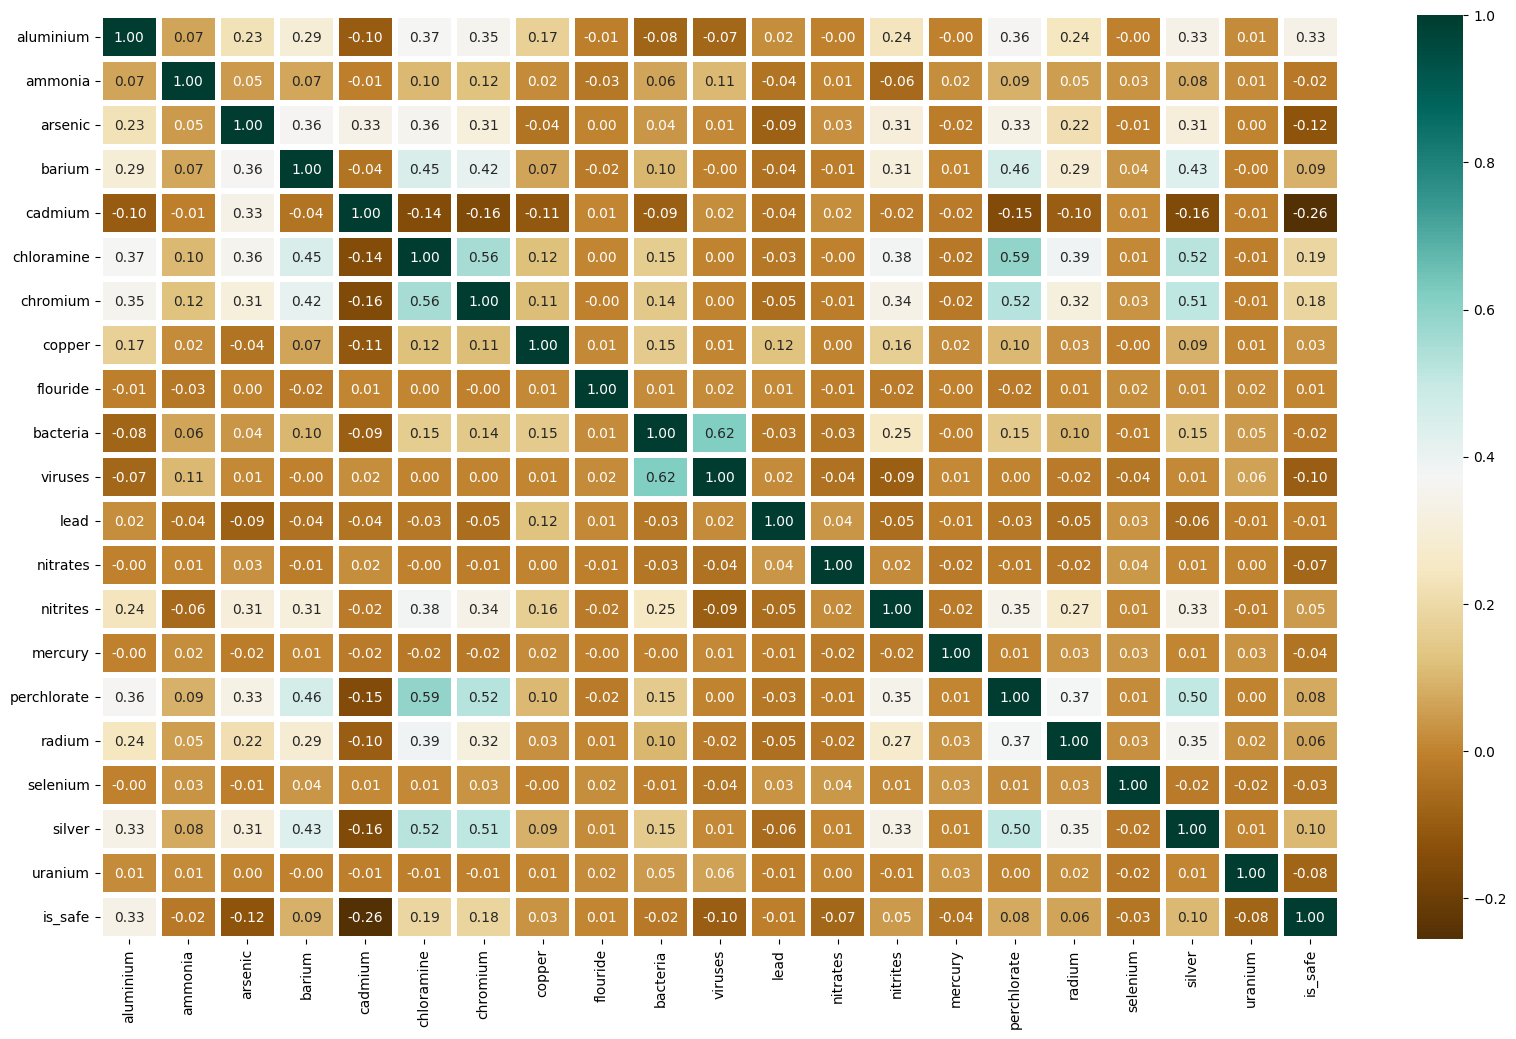

In [5]:
corr = data.corr(numeric_only = True)
plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

Bivariate analysis in terms of output variable (is_safe)

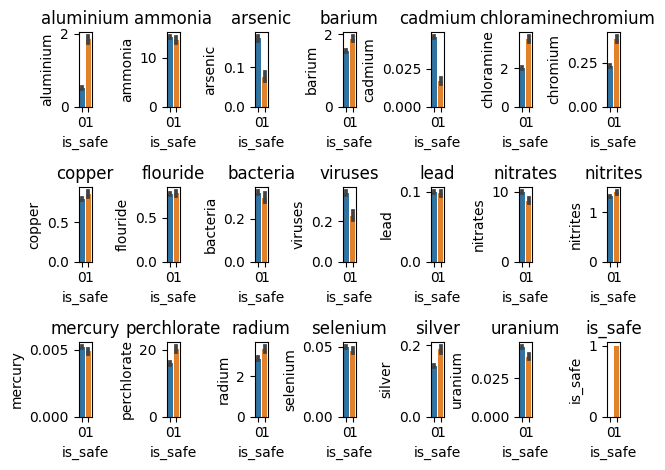

In [6]:
r=3; c=7; it=1
for i in data.columns:
  plt.subplot(r,c,it)
  sns.barplot(y=data.loc[:,i],x='is_safe',data=data)
  plt.title(i)
  it+=1
plt.tight_layout()
plt.show()

# Applying StandardScaler

In [7]:
X_scaled = StandardScaler().fit_transform(X_under)
X_under_scaled = DataFrame(X_scaled)
X_under_scaled.columns = X_under.columns
X_under_scaled.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,-0.736918,-0.713774,-0.478112,-0.949008,1.076942,-1.035179,-0.999481,-1.235306,-1.046092,-0.956342,1.002673,1.179997,-1.225476,-0.845242,-0.682635,-1.092083,-1.064749,1.458449,-0.966434,-1.199499
1,-0.736918,-1.147849,-0.390943,0.513950,1.076942,-1.042903,-0.856941,-0.206804,-1.046092,1.032151,1.002673,1.179997,-1.166514,0.840076,-0.682635,-1.083063,-1.077720,1.458449,-0.562282,-1.199499
2,-0.736918,0.863022,-0.390943,-1.382174,1.360111,-1.012010,-0.785671,-1.235306,-0.266417,-0.681012,-0.742736,1.214762,1.229493,-0.787788,0.324477,-0.929122,-0.986927,-0.976368,-0.696999,-0.825821
3,-0.736918,-1.000879,-0.390943,-1.235061,-0.055733,-1.039041,-0.999481,-1.250889,-1.435929,-0.681012,-0.764486,1.127849,1.388512,-1.534690,-0.682635,-1.088475,-1.250659,-1.324199,-1.033792,-1.573178
4,-0.769276,-0.959864,-0.303774,-0.360555,1.076942,-0.946364,-0.928211,-0.674305,0.031694,-0.956342,-0.764486,-1.166636,0.888227,0.782622,0.324477,-0.690994,0.223645,-0.280706,-0.764358,-0.825821


# a) Functional form of the predictive model for each algorithm.

In this excercise, three classifiers are choosen as base models:

1. DecisionTreeClassifier
2. LogisticRegression
3. SVC



1. The decision tree classifier is a type of supervised learning algorithm used in machine learning that helps to classify data by building a decision tree based on the input features of the data. To classify new data, the algorithm traverses the decision tree from the root to a leaf node based on the values of the input features, and assigns the corresponding class label or output.

  * Entropy: A measure of the impurity or randomness in a dataset. It
  is used to measure the homogeneity of a node.

    Entropy = - p1*log2(p1) - p2*log2(p2)

    where p1 and p2 are the probabilities of the two classes, and log
    is the logarithm function with base 2.
  * Gini: A measure of how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled

    Gini = 1 - (p1)^2 - (p2)^2

    where p1 and p2 are the probabilities of the two classes.

2. Logistic regression is a popular machine learning algorithm that predicts the probability of a binary outcome.

  The formula for the logistic function is:

  P(y=1|x) = 1 / (1 + e^(-z))

  where P(y=1|x) is the predicted probability of the positive class, x is the input features, z is the linear combination of the input features, and e is the mathematical constant approximately equal to 2.71828.

3. Support Vector Classifier (SVC) is a type of supervised learning algorithm used for classification problems. It has the following kernels:

 * Linear Kernel: It is suitable for linearly separable data and large datasets. It can be represented as":

    K(x, x') = x . x'
    
    where x and x' are the input feature vectors.

  * Polynomial Kernel: This kernel function allows SVC to model non-linear decision boundaries by transforming the data into a higher dimensional space using polynomial functions. The polynomial kernel function can be represented as:

    K(x, x') = (x . x' + r)^d

    where x and x' are the input feature vectors, r is a user-defined parameter called the coefficient, and d is a user-defined parameter called the degree of the polynomial.

  * Gaussian (RBF) Kernel: The Gaussian kernel function is a non-linear function that maps the input features to a higher-dimensional space where the data becomes separable. The Gaussian kernel function can be represented as:

    K(x, x') = exp(-gamma * ||x - x'||^2)

    where x and x' are the input feature vectors, ||.|| represents the Euclidean distance between the two feature vectors, and gamma is a user-defined parameter called the bandwidth of the kernel.

  * Sigmoid Kernel: It is particularly useful for binary classification problems. The sigmoid kernel function can be represented as:

    K(x, x') = tanh(alpha * (x . x') + c)

    where x and x' are the input feature vectors, alpha is a user-defined parameter called the scaling factor, and c is a user-defined parameter called the intercept.

# b) Training of each model & performance visualization

get_base_models() Defination

In [8]:
def get_base_models():
    models = dict()
    models['dt_ent'] = DecisionTreeClassifier(criterion='entropy')
    models['dt_gini'] = DecisionTreeClassifier(criterion='gini')
    models['lr'] = LogisticRegression(max_iter=10000)
    models['svc_linear'] = SVC(kernel='linear')
    models['svc_rbf'] = SVC()
    models['svc_sigmoid'] = SVC(kernel='sigmoid')
    models['svc_poly'] = SVC(kernel='poly')
    return models

Function defination for model evaluation

In [9]:
def evaluate_model_mcrun(model, X, y, test_ratio):
  recall = []
  for j in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = j)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    recall.append(recall_score(y_test, prediction, average='weighted'))
    score = mean(recall) 
  return score

Building a DataFrame: This DataFrame holds accuracy of each model for different ratio of train sets.

In [10]:
test_set_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
index_labels = ['90%','80%','70%','60%','50%']
column_labels = ['dt_ent', 'dt_gini', 'lr', 'svc_linear', 'svc_rbf', 'svc_sigmoid', 'svc_poly']

accuracy_DF = DataFrame(columns = column_labels, index = index_labels)
models = get_base_models()

for name, model in models.items():
  index = 0
  for test_set_ratio in test_set_ratios:
    accuracy_DF.at[index_labels[index], name] = evaluate_model_mcrun(model, X_under_scaled, y_under, test_set_ratio)
    index += 1

accuracy_DF

,dt_ent,dt_gini,lr,svc_linear,svc_rbf,svc_sigmoid,svc_poly
90%,0.901093,0.898907,0.77377,0.776503,0.871038,0.709836,0.848087
80%,0.908219,0.905479,0.766849,0.772329,0.870959,0.722466,0.839178
70%,0.910036,0.904745,0.770438,0.775182,0.865328,0.723175,0.835036
60%,0.907534,0.902055,0.772055,0.774521,0.861096,0.737808,0.829315
50%,0.902741,0.883443,0.76864,0.774671,0.860197,0.735526,0.820943


Performance visualization of each model using accuracy (y -axis) in terms of different ratio of trainsets (x-axis)

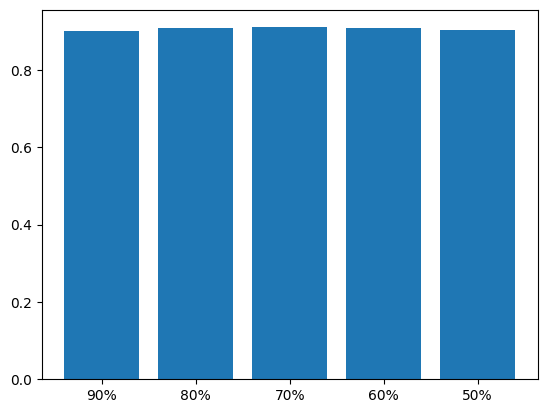

************************* dt_ent *************************



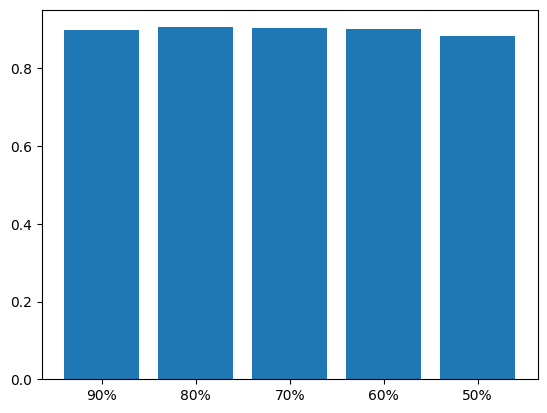

************************* dt_gini *************************



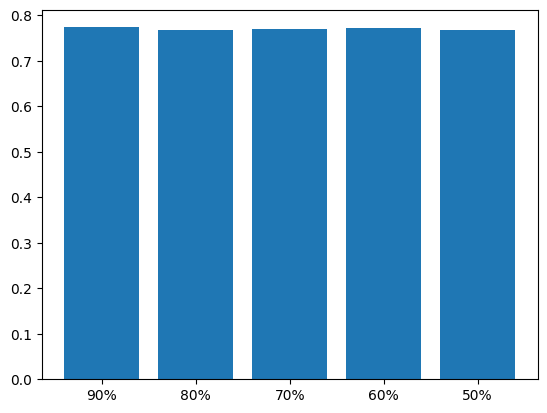

************************* lr *************************



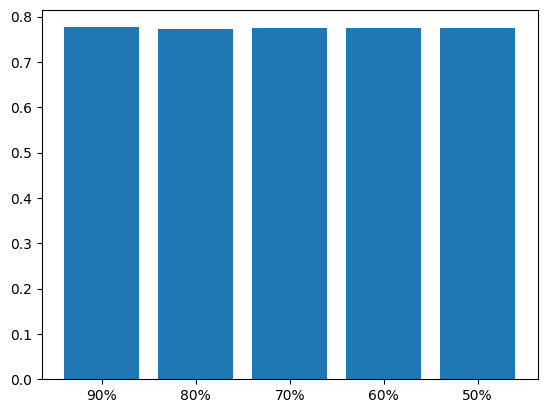

************************* svc_linear *************************



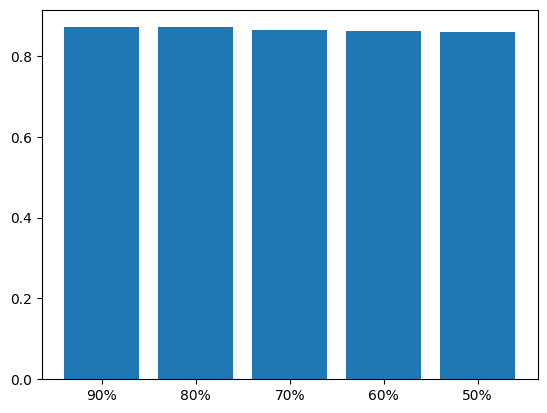

************************* svc_rbf *************************



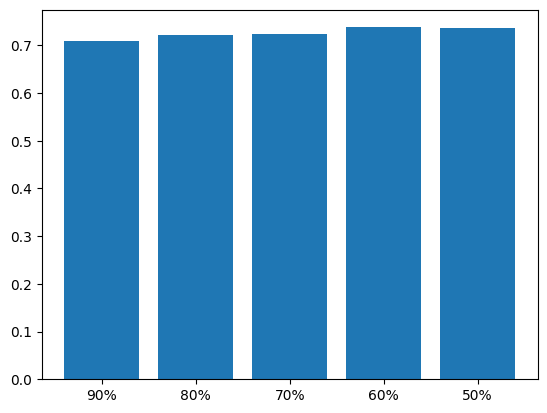

************************* svc_sigmoid *************************



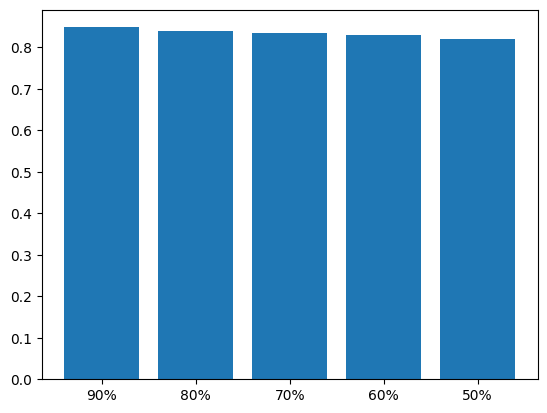

************************* svc_poly *************************



In [11]:
for model in column_labels:
  plt.bar(accuracy_DF.index, accuracy_DF[model])
  plt.show()
  print('************************* ' + model + ' *************************')
  print('')

From the above performance analysis, it can be seen that train set size: 70% is most suitable for training. DecisionTreeClassifier with 'entropy' has the highest accuracy for all training test ratio followed by DecisionTreeClassifier with 'gini' and SVC with RBF kernel.

**Best 3 Models**
1. DecisionTreeClassifier(criterion='entropy')
2. DecisionTreeClassifier(criterion='gini')
3. SVC()

# C) Implementation of Ensemble of Models (Bagging, Boosting, Stacking)
At this phase, ensemble models are applied on selected base models for even better accuracy.

Designing a stacking ensemble of models

In [13]:
def get_stacking():
    # **************Defining the Base Models: Level=0 Models**************
    level_0 = list()
    level_0.append(('dt_ent', DecisionTreeClassifier(criterion='entropy')))  # Model-A
    level_0.append(('dt_gini', DecisionTreeClassifier(criterion='gini')))  # Model-B
    level_0.append(('svc_rbf', SVC()))  # Model-C
    
    # **************Defining the Meta Learner: Level=1**************
    level_1 = DecisionTreeClassifier(criterion='entropy')
    
    # **************Designing the Stacking Ensemble of Models**************
    model_stacking = StackingClassifier(estimators=level_0, final_estimator=level_1)
    return model_stacking

Function defination for get_ensemble_models

In [14]:
def get_ensemble_models():
    model_ensemble = dict()
    dt_ent = DecisionTreeClassifier(criterion='entropy')
    model_ensemble['BaggingC'] = BaggingClassifier(estimator=dt_ent, n_estimators=50, max_samples=0.8, max_features=0.8)
    model_ensemble['BoostingC'] = AdaBoostClassifier(estimator=dt_ent, n_estimators=10, algorithm = 'SAMME')  # 10 steps
    model_ensemble['StackingC'] = get_stacking()
    return model_ensemble

Performance evaluation of each ensemble technique in 100 Monte Carlo runs and storing scores of each run in a DataFrame of each model

In [15]:
models = get_ensemble_models()
score_ensemble_DF = DataFrame(columns = ['BaggingC', 'BoostingC', 'StackingC'])

for name, model in models.items():
  for j in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_under_scaled, y_under, test_size = 0.3, random_state = j)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score_ensemble_DF.at[j, name] = recall_score(y_test, prediction, average='weighted')

score_ensemble_DF

,BaggingC,BoostingC,StackingC
0,0.930657,0.908759,0.879562
1,0.921533,0.916058,0.879562
2,0.928832,0.916058,0.888686
3,0.928832,0.903285,0.872263
4,0.908759,0.899635,0.875912
...,...,...,...
95,0.925182,0.919708,0.861314
96,0.903285,0.90146,0.874088
97,0.941606,0.905109,0.886861
98,0.917883,0.899635,0.877737


Performance visualization of each ensemble technique using boxplot

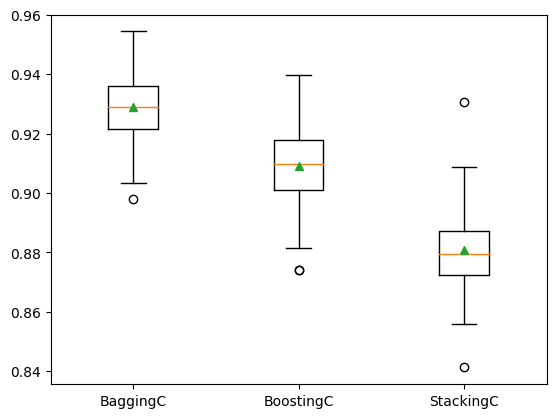

In [16]:
plt.boxplot(score_ensemble_DF, showmeans=True)
plt.xticks([1, 2, 3], ['BaggingC', 'BoostingC', 'StackingC'])
plt.show()

# d) Selection and deployment of best model
From the above performance analysis of ensemble models, it is seen that BaggingClassifier has the highest accuracy followed by Boosting & Stacking. Hence BaggingC is choosesn as the best ensemble model. It has the following advantages:

1. High accuracy: Bagging can improve the accuracy of predictions by reducing the bias of the model.
2. Parallelization: Bagging can be easily parallelized, as each model in the ensemble can be trained independently on different subsets of the data.
3. Reduced overfitting: It reduces overfitting by reducing the variance of the model

BaggingClassifier also has some limitations as follows:

1. Requires high processing power: Bagging ensemble model requres high computational resources for its complex algorithm especially for large datasets.
2. Limited performance gains: Bagging may not always lead to significant improvements in performance, especially if the base models are already highly accurate or the dataset is small.

In [17]:
best_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'), n_estimators=50, max_samples=0.8, max_features=0.8)
best_model.fit(X_under, y_under)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_features=0.8, max_samples=0.8, n_estimators=50)

# Question-2
Here, 'aluminium' is taken as the continous Output variable

In [18]:
X_reg = data.drop('aluminium', axis=1)  # Input
y_reg = data['aluminium']   # Output

# Applying Standard Scaler

In [19]:
X_reg_scaled = DataFrame(StandardScaler().fit_transform(X_reg))
X_reg_scaled.columns = X_reg.columns
X_reg_scaled.head()

,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,-0.585491,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.973050,-1.657446,-0.363345,-0.869387,-0.781070,1.129767,-0.348629,0.609178,1.203362,1.661842,1.053694,1.338736,-0.917040,2.787031
1,0.775118,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,0.294799,1.002460,0.849782,0.009785,-1.409197,1.046960,-0.739005,0.892977,0.124811,1.053694,0.851134,0.198023,2.787031
2,-0.029083,-0.480875,-0.812340,-0.965499,0.803417,1.044536,-1.202564,0.501507,-0.818614,-0.861452,-0.368450,0.783298,-0.383518,0.272132,1.911763,1.786699,0.706129,2.035310,-1.288728,-0.358805
3,-0.332067,-0.480875,1.144654,-1.159690,1.968179,-0.802892,1.306793,0.708215,1.184567,1.008475,-1.434385,-1.517469,-0.069511,-0.401960,-0.415275,-0.516695,-1.031700,2.104968,0.198023,2.787031
4,1.132165,-0.520460,-1.124801,-1.020982,0.191820,1.635713,-0.361012,-0.371261,-0.575804,-0.866742,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-1.031700,-0.611672,-0.917040,2.787031


Function defination for base regression models
Here the following regression models are choosen for base regressor:
1. DecisionTreeRegressor()
2. SVR()
3. LinearRegression()

In [20]:
def get_base_regression_models():
  models = dict()
  models['DTR'] = DecisionTreeRegressor()
  models['SVR'] = SVR()
  models['LinearRegression'] = LinearRegression()
  return models

Function defination for evaluating base regression models

In [21]:
def evaluate_regression_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

Performance evaluation of base regressors

In [22]:
models = get_base_regression_models() # Get list of Base models
scores, names = list(), list()
for name, model in models.items():
	scores.append(evaluate_regression_model(model, X_reg_scaled, y_reg))
	names.append(name)
	print('>Model: %s, Mean Score: %.3f, Standard Deviation: %.3f' % (name, mean(scores), std(scores)))

>Model: DTR, Mean Score: -0.662, Standard Deviation: 0.038
>Model: SVR, Mean Score: -0.592, Standard Deviation: 0.078
>Model: LinearRegression, Mean Score: -0.630, Standard Deviation: 0.085


Visualization of performance of base regressors

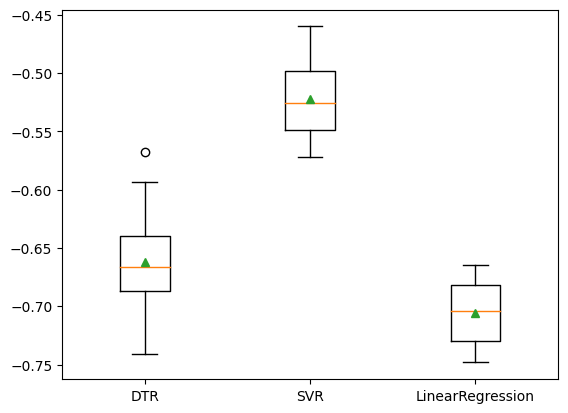

In [23]:
plt.boxplot(scores, labels=names, showmeans=True)
plt.show()

Applying various ensemble technique on base regressors (Bagging, Boosting, Stacking)

In [25]:
# **************Designing a Stacking Ensemble of Models**************

def get_reg_stacking():
    # **************Defining the Base Models: Level=0 Models**************
    level_0 = list()
    level_0.append(('DTR', DecisionTreeRegressor())) # Model-A
    level_0.append(('SVR', SVR())) # Model-B
    
    # **************Defining the Meta Learner: Level=1**************
    level_1 = DecisionTreeRegressor()
    
    # **************Designing the Stacking Ensemble of Models**************
    model_stacking = StackingRegressor(estimators=level_0, final_estimator=level_1)
    return model_stacking

In [26]:
def get_reg_ensemble_models():
    model_ensemble = dict()
    dtr = DecisionTreeRegressor()
    model_ensemble['BaggingR'] = BaggingRegressor(estimator=dtr)
    model_ensemble['BoostingR'] = AdaBoostRegressor(estimator=dtr)
    model_ensemble['StackingR'] = get_reg_stacking()
    return model_ensemble

Performance evaluation of ensemble methods of regression models

In [27]:
models = get_reg_ensemble_models() # Get list of Ensemble models
scores, names = list(), list()
for name, model in models.items():
	scores.append(evaluate_regression_model(model, X_reg_scaled, y_reg))
	names.append(name)
	print('>Model: %s, Mean Score: %.3f, Standard Deviation: %.3f' % (name, mean(scores), std(scores)))

>Model: BaggingR, Mean Score: -0.556, Standard Deviation: 0.029
>Model: BoostingR, Mean Score: -0.561, Standard Deviation: 0.029
>Model: StackingR, Mean Score: -0.702, Standard Deviation: 0.203


Boxplot visualization of the performance of ensemble models for regression analysis

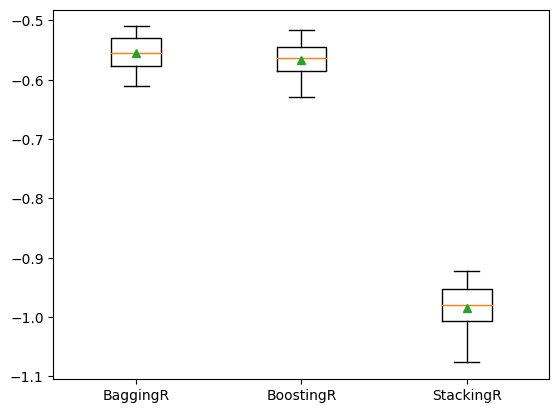

In [28]:
plt.boxplot(scores, labels=names, showmeans=True)
plt.show()

After applying performance analysis on ensemble models for regressors, it can be observed that BaggingR has the sore of -0.556, followed by BoostingR with score: -0.561 and StackingR with score: -0.702

# Question-3
# a) In this exercise, Linear Discriminant Analysis (LDA) is choosen for dimentionality reduction.

Pumpkin Seeds dataset is choosen for this analysis. It has binary classifiation output data (Class).

Link of the dataset: https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset

Reading data from excel file with sheet_name='Pumpkin_Seeds_Dataset'

In [37]:
data = read_excel(open('Pumpkin_Seeds_Dataset.xlsx', 'rb'), sheet_name='Pumpkin_Seeds_Dataset')
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


Output and input data selection

In [38]:
X = data.drop('Class', axis=1)  # Input
y = data['Class']   # Output
print(y.value_counts())

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64


Since the dataset is already balance, no sampling is required for this dataset

Applying StandardScaler to scale the input data

In [39]:
X_scaled = DataFrame(StandardScaler().fit_transform(X))
X_scaled.columns = X.columns
X_scaled.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166


In [40]:
model_LDA = LinearDiscriminantAnalysis()
X_lda = model_LDA.fit(X_scaled, y) # LDA is supervised learning 
X_lda.coef_

array([[ 73.99163297,  -3.56753567,  -9.68346214,  -7.55927064,
        -63.50159666,   5.76252247, -11.30304347,  -0.56583802,
          0.07462226,  -1.50448342,  -9.27860927, -24.10144069]])

No of features: 20

No of classes of output variable: 2

Therefore, number of LDAs = min(20, 2-1) = 1

So, the no of feature choosen: 1

In [41]:
X_lda = model_LDA.fit_transform(X_scaled, y)
X_lda_DF = DataFrame(X_lda)
X_lda_DF.columns = ['LDA1']
X_lda_DF

,LDA1
0,-2.315888
1,-1.530154
2,0.121197
3,-1.829642
4,-1.899057
...,...
2495,2.303152
2496,1.845518
2497,1.579062
2498,1.900792


In [42]:
model_LDA.explained_variance_ratio_

array([1.])

Therefore, LDA1 contains 100% of the information

# b) Implementation of DecisionTreeClassifier on the dataset
Performance evaluation using 500 MC-run without feature reduction

In [43]:
start = time. time()
accuracy = []
for i in range(500):
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)
  dt = DecisionTreeClassifier().fit(X_train, y_train) # Model fitting
  prediction = dt.predict(X_test) # Prediction
  accuracy.append(accuracy_score(y_test, prediction)) # Compute & append accuracy
print("DT only accuracy using 500 MC run: ", mean(accuracy))  # Average of accuracy to stablize the result
end = time. time()
processing_time = end-start
print(processing_time)

DT only accuracy using 500 MC run:  0.835536
15.388968706130981


Performance evaluation using 500 MC-run with LDA feature reduction

In [44]:
start = time. time()
accuracy = []
for i in range(500):
  X_train, X_test, y_train, y_test = train_test_split(X_lda_DF, y, test_size = 0.3)
  dt = DecisionTreeClassifier().fit(X_train, y_train) # Model fitting
  prediction = dt.predict(X_test) # Prediction
  accuracy.append(accuracy_score(y_test, prediction)) # Compute & append accuracy
print("DT+LDA accuracy using 500 MC run: ", mean(accuracy))  # Average of accuracy to stablize the result
end = time. time()
processing_time = end-start
print(processing_time)

DT+LDA accuracy using 500 MC run:  0.8205866666666666
7.511392116546631


From both of the reaults for 500 MC-runs, it can be concluded that although DT+LDA has slightly lower accuracy, about 82% as compared to DT only with accuracy about 83%, LDA+DT has significantly high performance with 7.5 seconds as compared to DT only process time: 15.4 seconds.